# Capstone Project
## Overview

If you are planning on going out to see a movie, how well can you trust online reviews and ratings? *Especially* if the same company showing the rating *also* makes money by selling movie tickets. Do they have a bias towards rating movies higher than they should be rated?

### Goal:

**The goal is to complete the tasks below based off the 538 article and see if we reach a similar conclusion. We will need to use pandas and visualization skills to determine if Fandango's ratings in 2015 had a bias towards rating movies better to sell more tickets.**

## Part One: Understanding the Background and Data


**TASK: Read this article: [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)**

----

**TASK: After reading the article, read these two tables giving an overview of the two .csv files we will be working with:**

### The Data

This is the data behind the story [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) openly available on 538's github: https://github.com/fivethirtyeight/data. There are two csv files, one with Fandango Stars and Displayed Ratings, and the other with aggregate data for movie ratings from other sites, like Metacritic,IMDB, and Rotten Tomatoes.

#### all_sites_scores.csv

-----

`all_sites_scores.csv` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

----
----

#### fandango_scape.csv

`fandango_scrape.csv` contains every film 538 pulled from Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

----

**TASK: Import libraries:**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part Two: Exploring Fandango Displayed Scores versus True User Ratings

Let's first explore the Fandango ratings to see if our analysis agrees with the article's conclusion.

**TASK: Read in the fandango_scrape.csv file**

In [3]:
fandango = pd.read_csv("D:\\Projects\\ML & DS\\Fandango Ratings\\fandango_scrape.csv")
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


**TASK: Explore the DataFrame Properties and Head.**

In [4]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    510 non-null    object 
 1   STARS   510 non-null    float64
 2   RATING  510 non-null    float64
 3   VOTES   510 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 16.1+ KB


In [5]:
fandango.describe()

,STARS,RATING,VOTES
count,510.000000,510.000000,510.000000
mean,3.532353,3.351765,1134.364706
std,1.585616,1.512628,3809.952176
min,0.000000,0.000000,0.000000
25%,3.500000,3.025000,2.000000
50%,4.000000,3.800000,17.500000
75%,4.500000,4.300000,183.500000
max,5.000000,5.000000,34846.000000


**TASK: Let's explore the relationship between popularity of a film and its rating. Creating a scatterplot showing the relationship between rating and votes.**

<Axes: xlabel='RATING', ylabel='VOTES'>

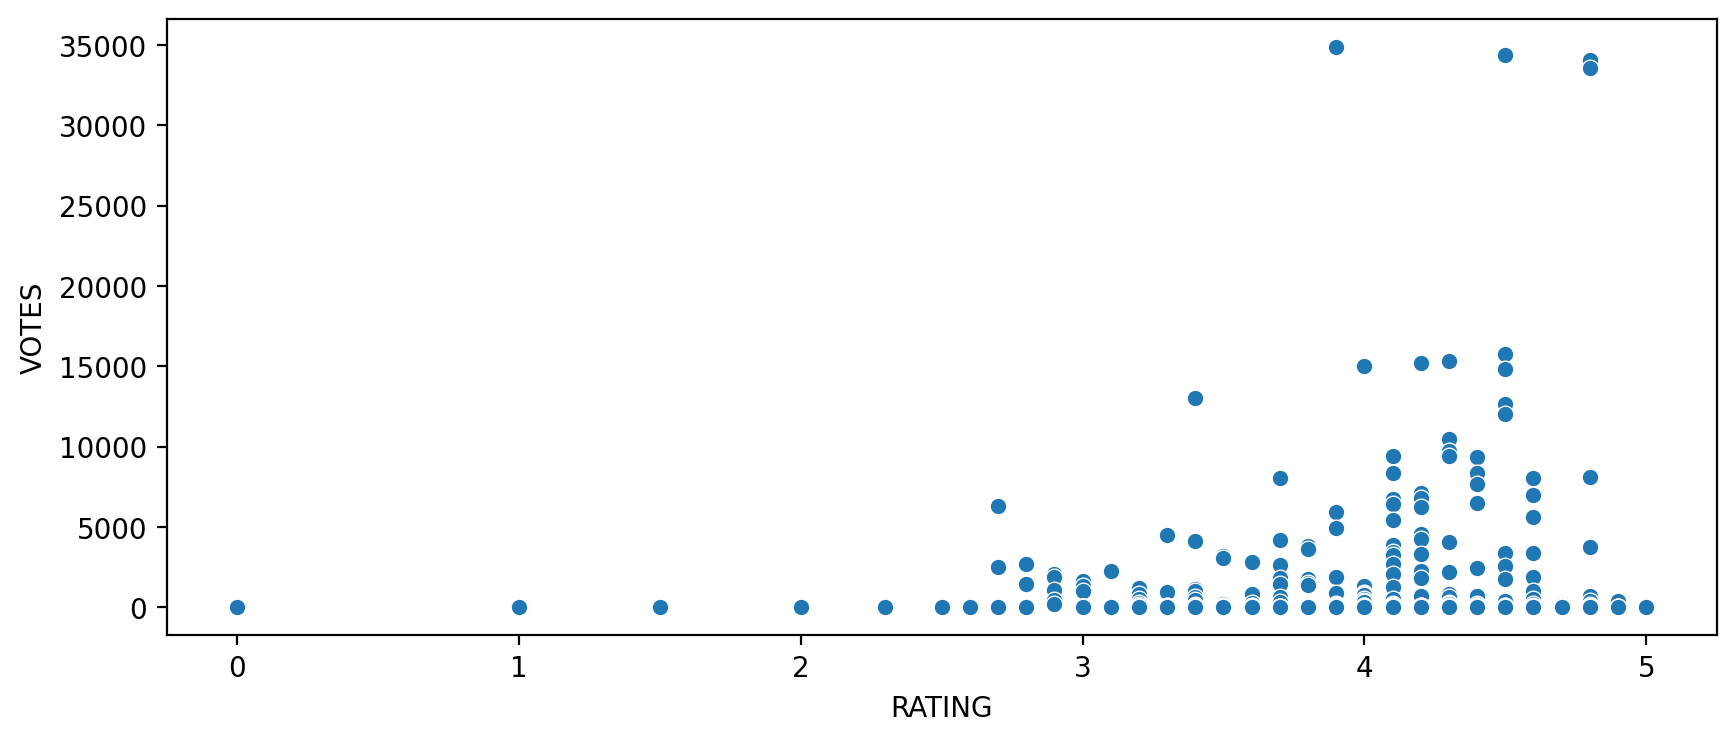

In [6]:
plt.figure(figsize=(10, 4), dpi=200)
sns.scatterplot(data=fandango,x='RATING',y='VOTES')

**TASK: Assuming that every row in the FILM title column has the same format:**

    Film Title Name (Year)
    
**Create a new column that is able to strip the year from the title strings and set this new column as YEAR**

In [9]:
vector = np.vectorize(lambda x: x.split(' ')[-1][1:-1])
fandango['YEAR'] = vector(fandango['FILM'])
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
505,Valiyavan (2015),0.0,0.0,0,2015
506,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
507,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
508,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


**TASK: How many movies are in the Fandango DataFrame per year?**

In [10]:
fandango['YEAR'].value_counts()

YEAR
2015    478
2014     23
1         7
2016      1
1964      1
Name: count, dtype: int64

**TASK: Visualize the count of movies per year with a plot:**

Text(0.5, 0, 'Year')

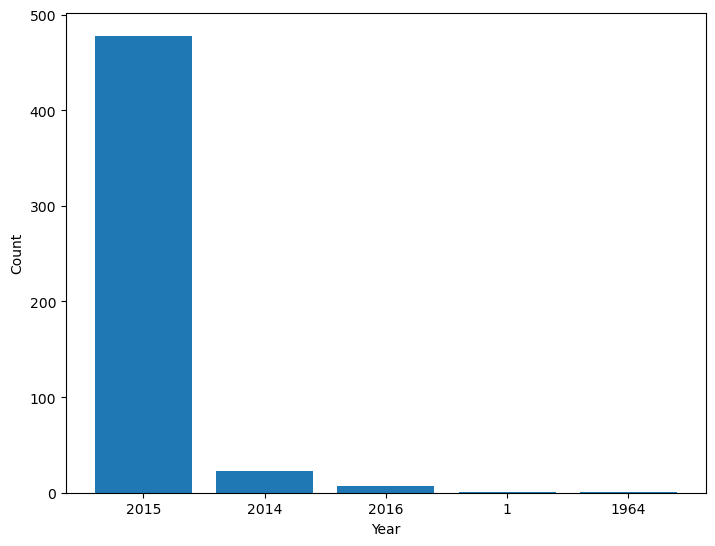

In [11]:
fig = plt.figure()

axes = fig.add_axes([0, 0, 1, 1])

axes.bar(fandango['YEAR'].unique(),fandango['YEAR'].value_counts())

axes.set_ylabel('Count')
axes.set_xlabel('Year')

**TASK: What are the 10 movies with the highest number of votes?**

In [12]:
fandango.sort_values('VOTES', ascending=False)[:10]

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


**TASK: How many movies have zero votes?**

In [13]:
len(fandango[fandango['VOTES'] == 0])

73

**TASK: Create DataFrame of only reviewed films by removing any films that have zero votes.**

In [14]:
fandango = fandango[fandango['VOTES'] > 0].copy()
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
432,That Sugar Film (2015),5.0,5.0,1,2015
433,The Intern (2015),5.0,5.0,1,2015
434,The Park Bench (2015),5.0,5.0,1,2015
435,The Wanted 18 (2015),5.0,5.0,1,2015


----

**TASK: Create a KDE plot (or multiple kdeplots) that displays the distribution of ratings that are displayed (STARS) versus what the true rating was from votes (RATING). Clip the KDEs to 0-5.**

<Figure size 2000x800 with 0 Axes>

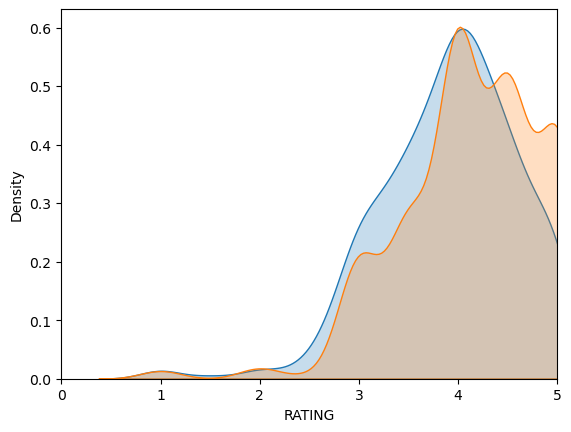

In [17]:
plt.figure(figsize=(10, 4), dpi=200)

fig, axes = plt.subplots()
sns.kdeplot(data=fandango['RATING'], ax=axes, fill=True)
sns.kdeplot(data=fandango['STARS'], ax=axes, fill=True)

axes.set_xlim((0, 5));

**TASK: Let's now actually quantify this discrepancy. Create a new column of the difference between STARS displayed versus true RATING. Calculate this difference with STARS-RATING and round these differences to the nearest decimal point.**

In [18]:
fandango['STARS_DIFF'] = round((fandango['STARS'] - fandango['RATING']), 1)
fandango

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
432,That Sugar Film (2015),5.0,5.0,1,2015,0.0
433,The Intern (2015),5.0,5.0,1,2015,0.0
434,The Park Bench (2015),5.0,5.0,1,2015,0.0
435,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


**TASK: Create a count plot to display the number of times a certain difference occurs:**

<Axes: xlabel='STARS_DIFF', ylabel='count'>

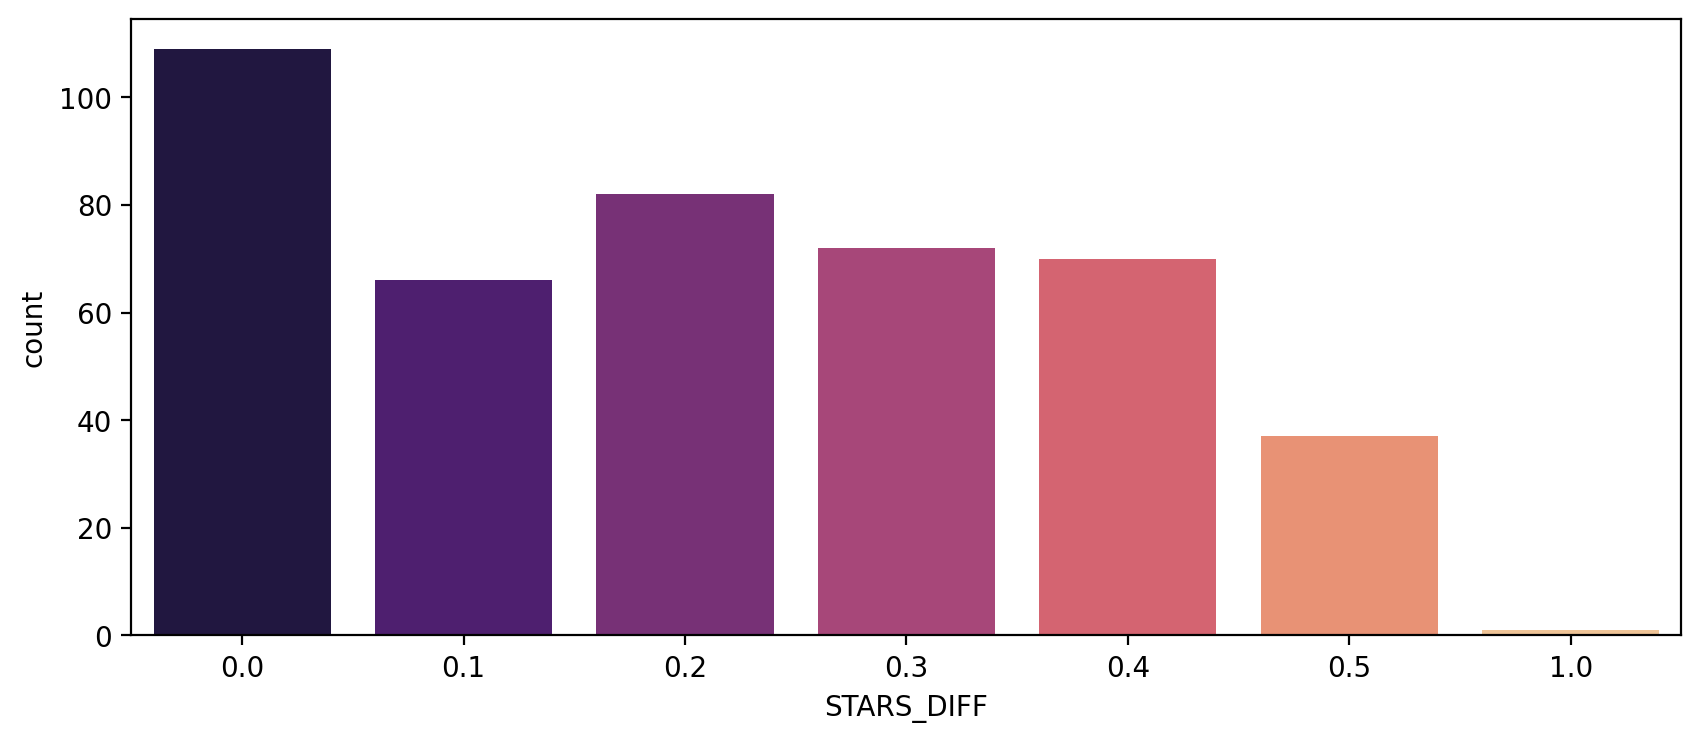

In [19]:
plt.figure(figsize=(10, 4), dpi=200)
sns.countplot(data=fandango, x='STARS_DIFF', palette='magma')

**TASK: We can see from the plot that one movie was displaying over a 1 star difference than its true rating! What movie had this close to 1 star differential?**

In [20]:
fandango[fandango['STARS_DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Part Three: Comparison of Fandango Ratings to Other Sites

Let's now compare the scores from Fandango to other movies sites and see how they compare.

**TASK: Read in the "all_sites_scores.csv" file**

In [22]:
all_sites = pd.read_csv("D:\\Projects\\ML & DS\\Fandango Ratings\\all_sites_scores.csv")
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


**TASK: Explore the DataFrame columns, info, description.**

In [23]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


In [24]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


### Rotten Tomatoes

Let's first take a look at Rotten Tomatoes. RT has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews. 

**TASK: Create a scatterplot exploring the relationship between RT Critic reviews and RT User reviews.**

<Axes: xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

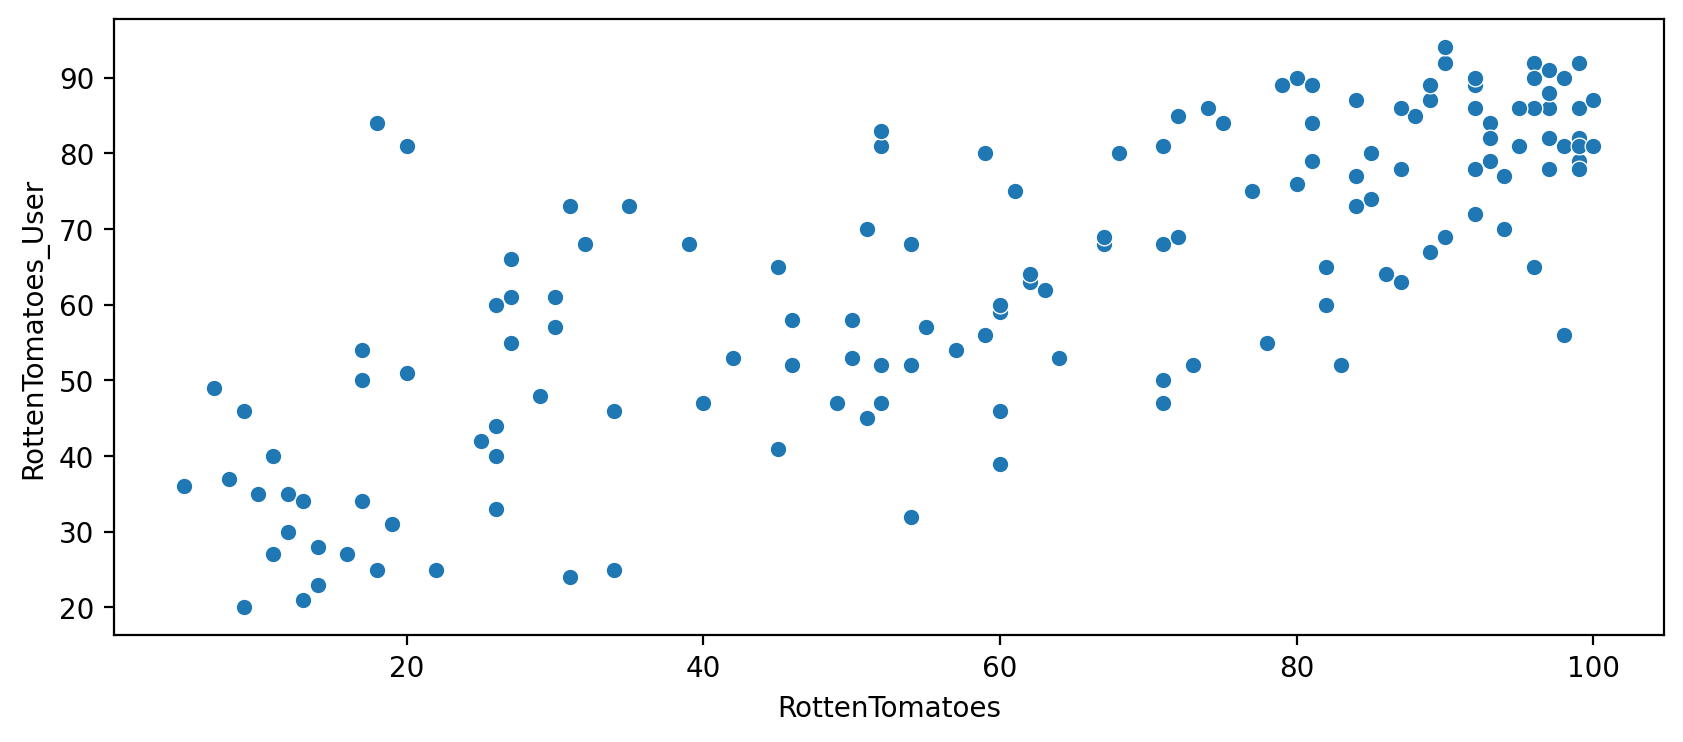

In [25]:
plt.figure(figsize=(10, 4), dpi=200)

sns.scatterplot(data=all_sites,x='RottenTomatoes',y='RottenTomatoes_User')

Let's quantify this difference by comparing the critics ratings and the RT User ratings. We will calculate this with RottenTomatoes-RottenTomatoes_User. So values closer to 0 means aggrement between Critics and Users. Larger positive values means critics rated much higher than users. Larger negative values means users rated much higher than critics.

**TASK: Create a new column based off the difference between critics ratings and users ratings for Rotten Tomatoes. Calculate this with RottenTomatoes-RottenTomatoes_User**

In [26]:
all_sites['RT_DIFF'] = (all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User'])
all_sites['RT_DIFF']

0     -12
1       5
2     -10
3     -66
4     -14
       ..
141     9
142    15
143    19
144    19
145    24
Name: RT_DIFF, Length: 146, dtype: int64

Let's now compare the overall mean difference. Since we're dealing with differences that could be negative or positive, first take the absolute value of all the differences, then take the mean. This would report back on average to absolute difference between the critics rating versus the user rating.

**TASK: Calculate the Mean Absolute Difference between RT scores and RT User scores as described above.**

In [27]:
abs(all_sites['RT_DIFF']).mean()

15.095890410958905

**TASK: Plot the distribution of the differences between RT Critics Score and RT User Score. There should be negative values in this distribution plot.**

<Axes: xlabel='RT_DIFF', ylabel='Count'>

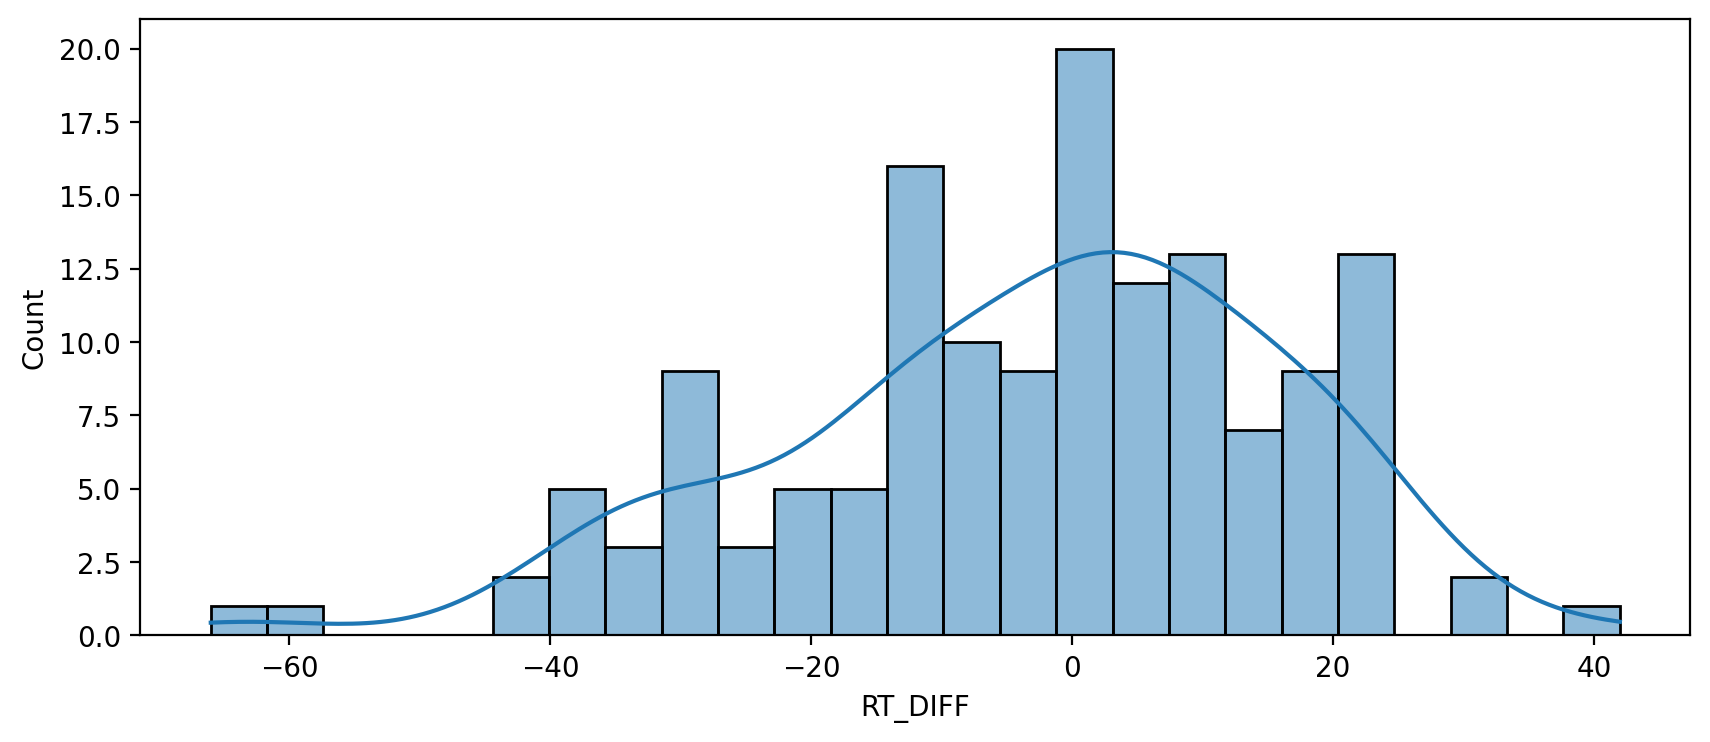

In [28]:
plt.figure(figsize=(10, 4), dpi=200)

sns.histplot(data=all_sites,x='RT_DIFF',kde=True,bins=25)

**TASK: Now create a distribution showing the *absolute value* difference between Critics and Users on Rotten Tomatoes.**

<Axes: xlabel='ABS_RT_DIFF', ylabel='Count'>

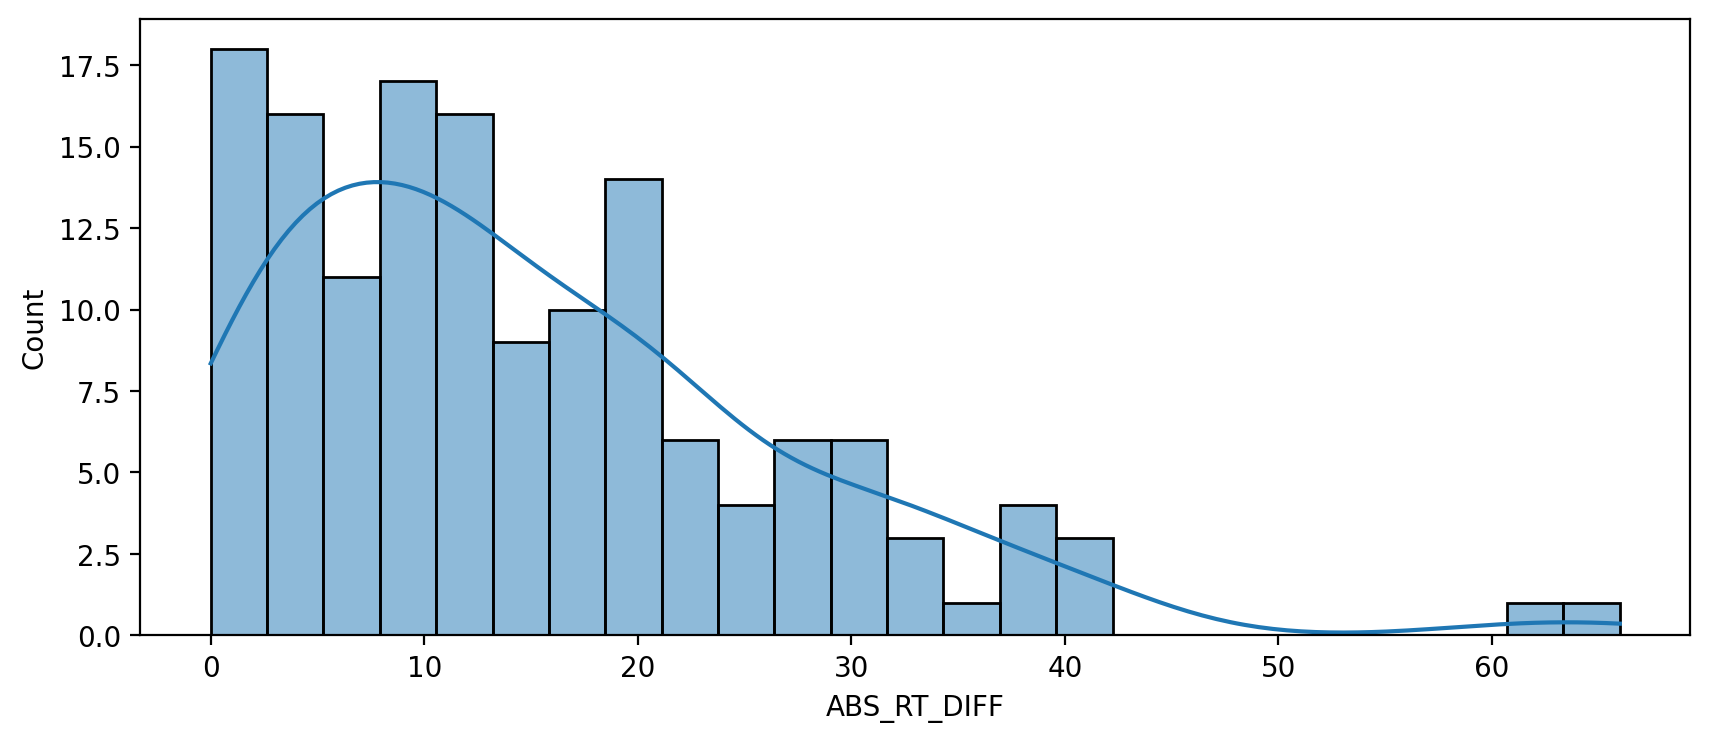

In [29]:
plt.figure(figsize=(10, 4), dpi=200)
all_sites['ABS_RT_DIFF'] = all_sites['RT_DIFF'].apply(abs)


sns.histplot(data=all_sites,x='ABS_RT_DIFF',kde=True,bins=25)

**Let's find out which movies are causing the largest differences. First, show the top 5 movies with the largest *negative* difference between Users and RT critics. Since we calculated the difference as Critics Rating - Users Rating, then large negative values imply the users rated the movie much higher on average than the critics did.**

**TASK: What are the top 5 movies users rated higher than critics on average:**

In [30]:
all_sites.sort_values('RT_DIFF')[:5]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_DIFF,ABS_RT_DIFF
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66,66
85,Little Boy (2015),20,81,30,5.9,7.4,38,5927,-61,61
134,The Longest Ride (2015),31,73,33,4.8,7.2,49,25214,-42,42
105,Hitman: Agent 47 (2015),7,49,28,3.3,5.9,67,4260,-42,42
125,The Wedding Ringer (2015),27,66,35,3.3,6.7,126,37292,-39,39


**TASK: Now show the top 5 movies critics scores higher than users on average.**

In [31]:
all_sites.sort_values('RT_DIFF', ascending=False)[:5]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_DIFF,ABS_RT_DIFF
69,Mr. Turner (2014),98,56,94,6.6,6.9,98,13296,42,42
112,It Follows (2015),96,65,83,7.5,6.9,551,64656,31,31
115,While We're Young (2015),83,52,76,6.7,6.4,65,17647,31,31
145,"Kumiko, The Treasure Hunter (2015)",87,63,68,6.4,6.7,19,5289,24,24
37,Welcome to Me (2015),71,47,67,6.9,5.9,33,8301,24,24


## MetaCritic

Now let's take a look at the ratings from MetaCritic. Metacritic also shows an average user rating versus their official displayed rating.

**TASK: Display a scatterplot of the Metacritic Rating versus the Metacritic User rating.**

<Axes: xlabel='Metacritic', ylabel='Metacritic_User'>

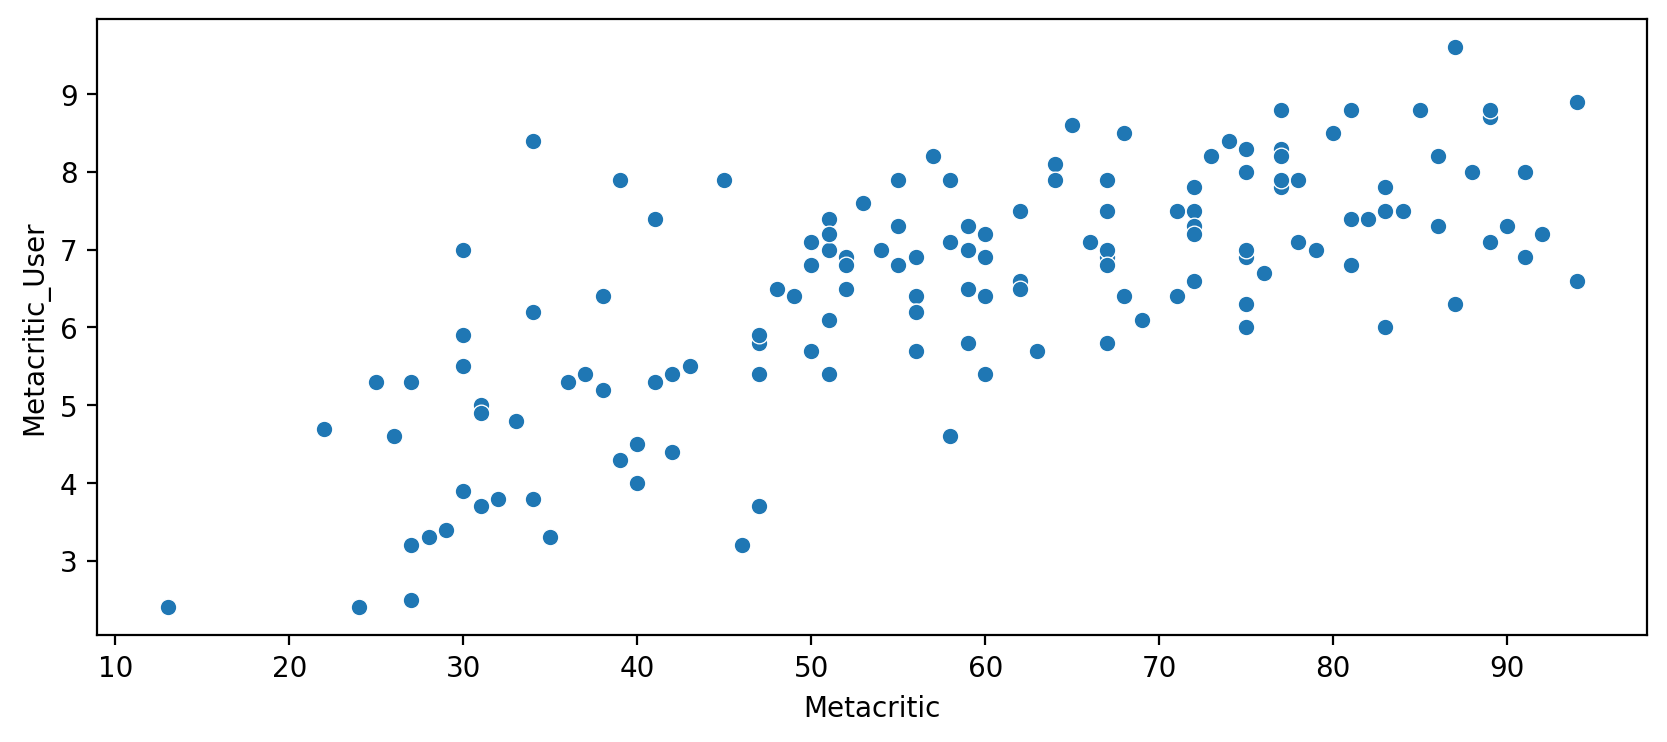

In [32]:
plt.figure(figsize=(10, 4), dpi=200)

sns.scatterplot(data=all_sites,x='Metacritic',y='Metacritic_User')

## IMDB

Finally let's explore IMDB. Notice that both Metacritic and IMDB report back vote counts. Let's analyze the most popular movies.


**TASK: Create a scatterplot for the relationship between vote counts on MetaCritic versus vote counts on IMDB.**

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

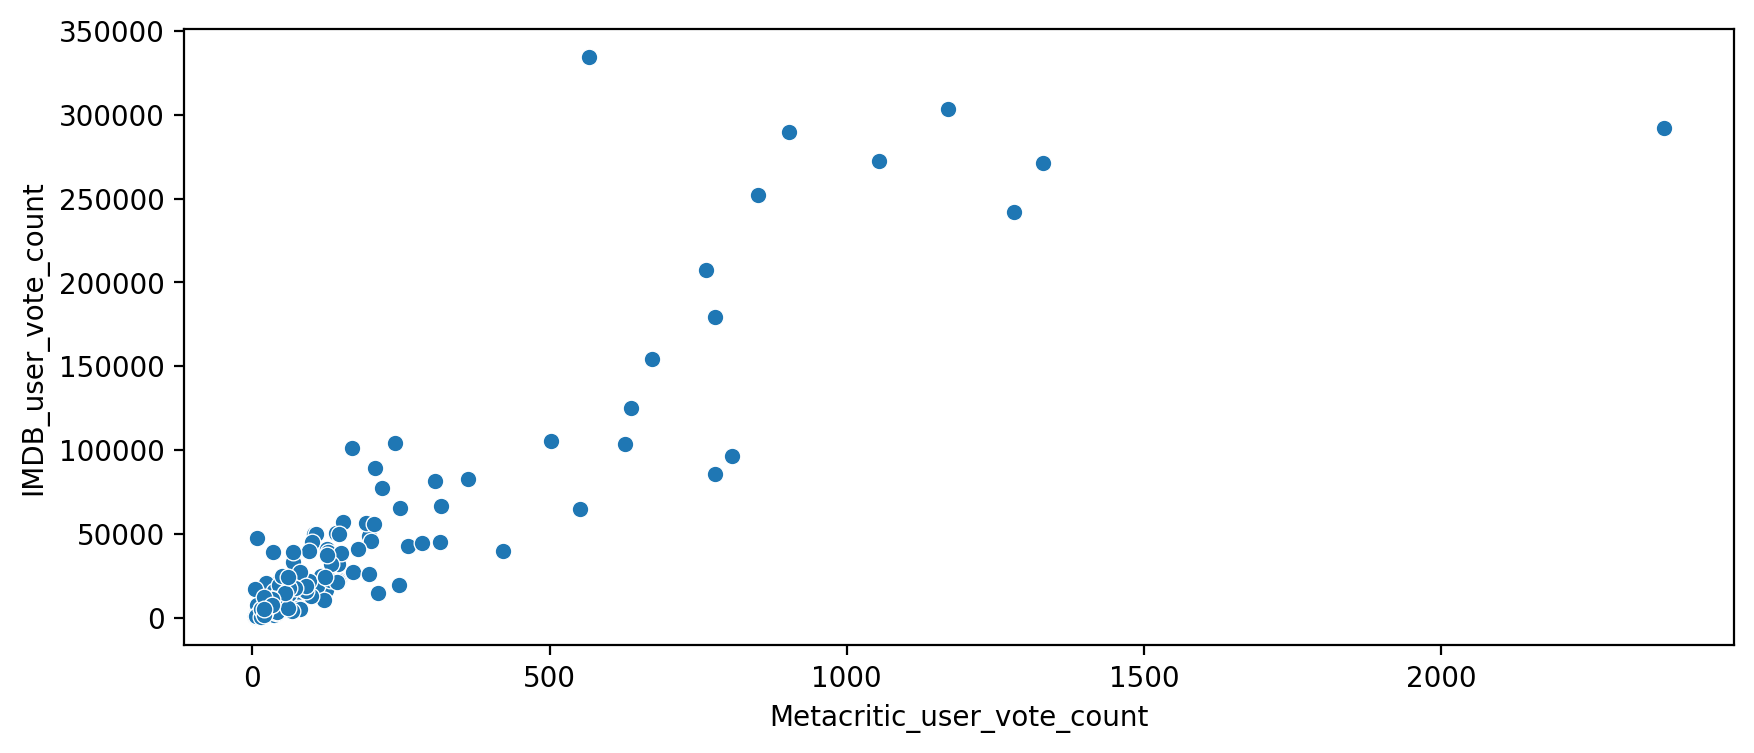

In [33]:
plt.figure(figsize=(10, 4), dpi=200)

sns.scatterplot(data=all_sites,x='Metacritic_user_vote_count',y='IMDB_user_vote_count')

**Notice there are two outliers here. The movie with the highest vote count on IMDB only has about 500 Metacritic ratings. What is this movie?**

**TASK: What movie has the highest IMDB user vote count?**

In [34]:
all_sites.sort_values('IMDB_user_vote_count', ascending=False)[:1]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_DIFF,ABS_RT_DIFF
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2,2


**TASK: What movie has the highest Metacritic User Vote count?**

In [35]:
all_sites.sort_values('Metacritic_user_vote_count', ascending=False)[:1]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_DIFF,ABS_RT_DIFF
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9,9


## Fandago Scores vs. All Sites

Finally let's begin to explore whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales.

**TASK: Combine the Fandango Table with the All Sites table. Not every movie in the Fandango table is in the All Sites table, since some Fandango movies have very little or no reviews. We only want to compare movies that are in both DataFrames, so do an *inner* merge to merge together both DataFrames based on the FILM columns.**

In [43]:
combined = pd.merge(all_sites, fandango, how='inner', on='FILM')
combined

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_DIFF,ABS_RT_DIFF,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12,12,5.0,4.5,14846,2015,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5,5,5.0,4.5,12640,2015,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10,10,5.0,4.5,12055,2015,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66,66,5.0,4.5,1793,2015,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14,14,3.5,3.0,1021,2015,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9,9,4.0,4.0,1348,2015,0.0
141,'71 (2015),97,82,83,7.5,7.2,60,24116,15,15,3.5,3.5,192,2015,0.0
142,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19,19,3.5,3.5,118,2014,0.0
143,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19,19,3.5,3.5,59,2015,0.0


In [44]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   RottenTomatoes              145 non-null    int64  
 2   RottenTomatoes_User         145 non-null    int64  
 3   Metacritic                  145 non-null    int64  
 4   Metacritic_User             145 non-null    float64
 5   IMDB                        145 non-null    float64
 6   Metacritic_user_vote_count  145 non-null    int64  
 7   IMDB_user_vote_count        145 non-null    int64  
 8   RT_DIFF                     145 non-null    int64  
 9   ABS_RT_DIFF                 145 non-null    int64  
 10  STARS                       145 non-null    float64
 11  RATING                      145 non-null    float64
 12  VOTES                       145 non-null    int64  
 13  YEAR                        145 non

### Normalize columns to Fandango STARS and RATINGS 0-5 

Notice that RT,Metacritic, and IMDB don't use a score between 0-5 stars like Fandango does. In order to do a fair comparison, we need to *normalize* these values so they all fall between 0-5 stars and the relationship between reviews stays the same.

**TASK: Create new normalized columns for all ratings so they match up within the 0-5 star range shown on Fandango. There are many ways to do this.**

In [45]:
combined['IMDB'] = combined['IMDB'] / 2
combined['Metacritic'] = combined['Metacritic'] / 20
combined['RottenTomatoes'] = combined['RottenTomatoes'] / 20
combined

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_DIFF,ABS_RT_DIFF,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Avengers: Age of Ultron (2015),3.70,86,3.30,7.1,3.90,1330,271107,-12,12,5.0,4.5,14846,2015,0.5
1,Cinderella (2015),4.25,80,3.35,7.5,3.55,249,65709,5,5,5.0,4.5,12640,2015,0.5
2,Ant-Man (2015),4.00,90,3.20,8.1,3.90,627,103660,-10,10,5.0,4.5,12055,2015,0.5
3,Do You Believe? (2015),0.90,84,1.10,4.7,2.70,31,3136,-66,66,5.0,4.5,1793,2015,0.5
4,Hot Tub Time Machine 2 (2015),0.70,28,1.45,3.4,2.55,88,19560,-14,14,3.5,3.0,1021,2015,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,Mr. Holmes (2015),4.35,78,3.35,7.9,3.70,33,7367,9,9,4.0,4.0,1348,2015,0.0
141,'71 (2015),4.85,82,4.15,7.5,3.60,60,24116,15,15,3.5,3.5,192,2015,0.0
142,"Two Days, One Night (2014)",4.85,78,4.45,8.8,3.70,123,24345,19,19,3.5,3.5,118,2014,0.0
143,Gett: The Trial of Viviane Amsalem (2015),5.00,81,4.50,7.3,3.90,19,1955,19,19,3.5,3.5,59,2015,0.0


**TASK: Now create a norm_scores DataFrame that only contains the normalizes ratings. Include both STARS and RATING from the original Fandango table.**

In [46]:
norm_scores = combined[['STARS', 'RATING', 'RottenTomatoes', 'Metacritic', 'IMDB']].copy()
norm_scores

,STARS,RATING,RottenTomatoes,Metacritic,IMDB
0,5.0,4.5,3.70,3.30,3.90
1,5.0,4.5,4.25,3.35,3.55
2,5.0,4.5,4.00,3.20,3.90
3,5.0,4.5,0.90,1.10,2.70
4,3.5,3.0,0.70,1.45,2.55
...,...,...,...,...,...
140,4.0,4.0,4.35,3.35,3.70
141,3.5,3.5,4.85,4.15,3.60
142,3.5,3.5,4.85,4.45,3.70
143,3.5,3.5,5.00,4.50,3.90


### Comparing Distribution of Scores Across Sites


Now the moment of truth! Does Fandango display abnormally high ratings? We already know it pushs displayed RATING higher than STARS, but are the ratings themselves higher than average?


**TASK: Create a plot comparing the distributions of normalized ratings across all sites. There are many ways to do this, but explore the Seaborn KDEplot docs for some simple ways to quickly show this. Don't worry if your plot format does not look exactly the same as ours, as long as the differences in distribution are clear.**

In [50]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legend_handles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

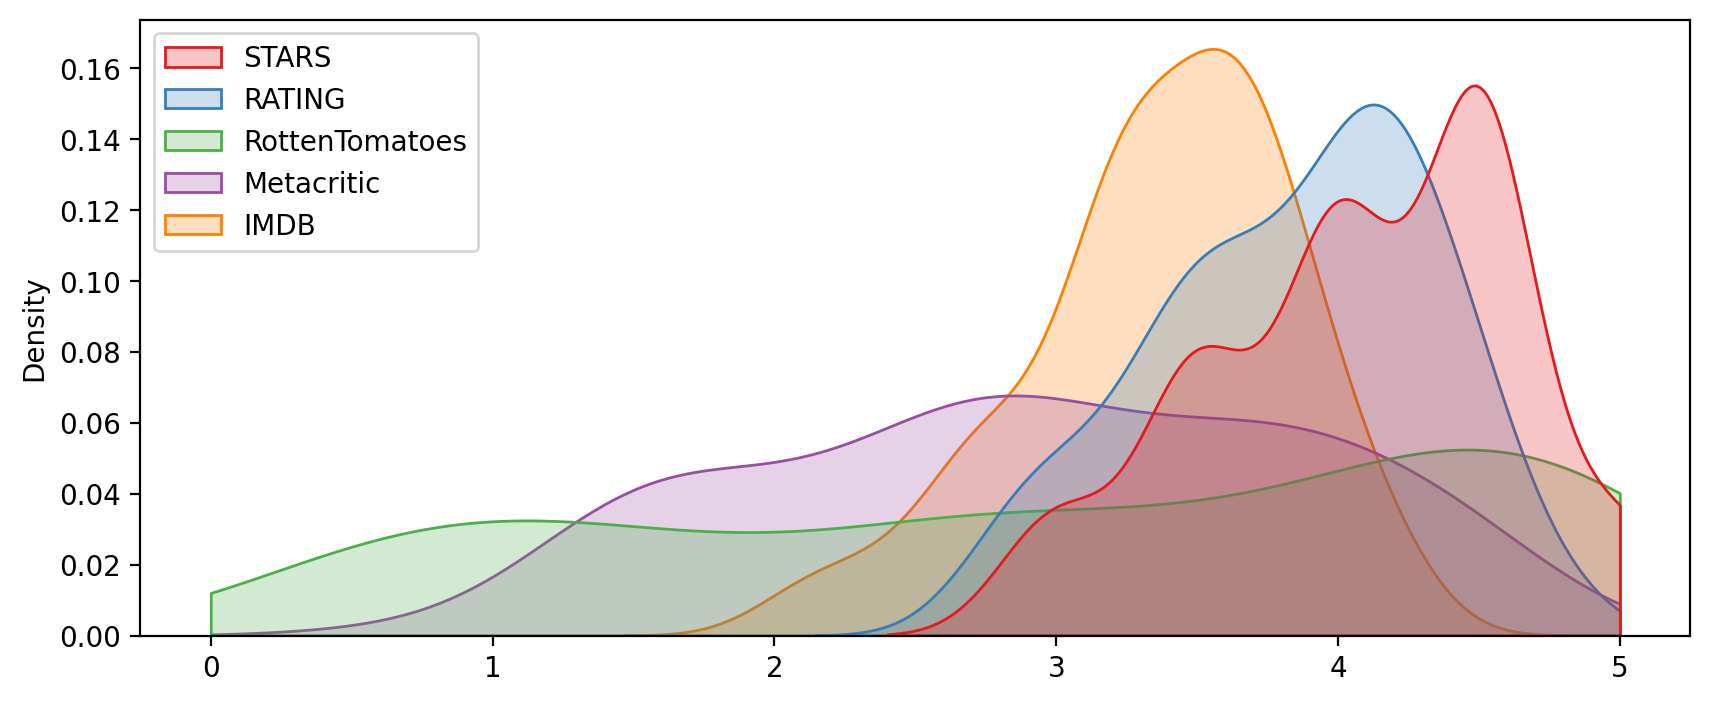

In [51]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=200)
sns.kdeplot(data=norm_scores, fill=True, clip=(0, 5), palette='Set1')

move_legend(ax, 'upper left')

**Clearly Fandango has an uneven distribution. We can also see that RT critics have the most uniform distribution. Let's directly compare these two.** 

**TASK: Create a KDE plot that compare the distribution of RT critic ratings against the STARS displayed by Fandango.**

<Axes: ylabel='Density'>

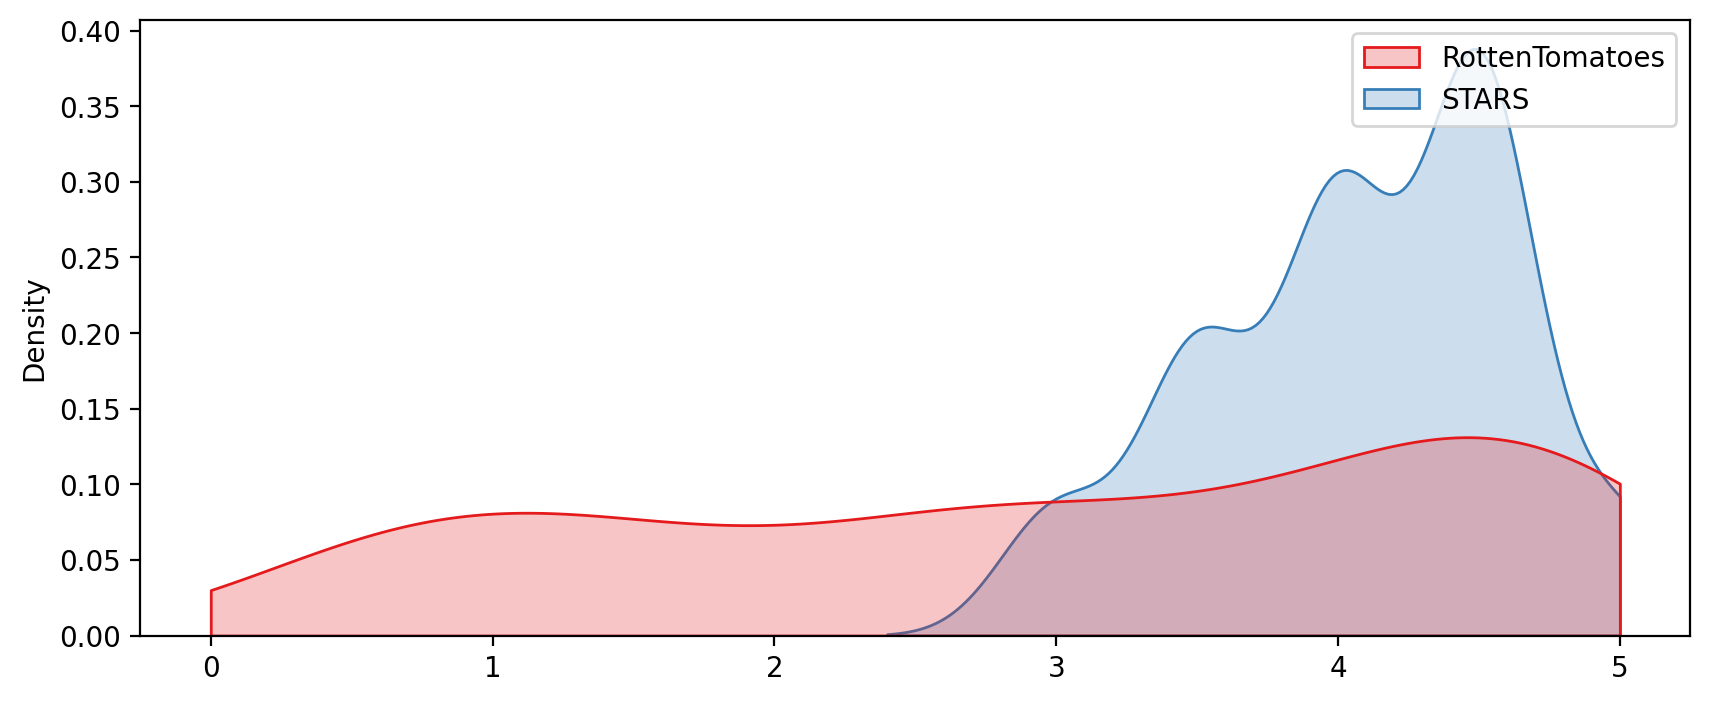

In [53]:
plt.figure(figsize=(10, 4), dpi=200)

sns.kdeplot(data=norm_scores[['RottenTomatoes', 'STARS']],fill=True,clip=(0, 5),palette='Set1')

<Axes: ylabel='Count'>

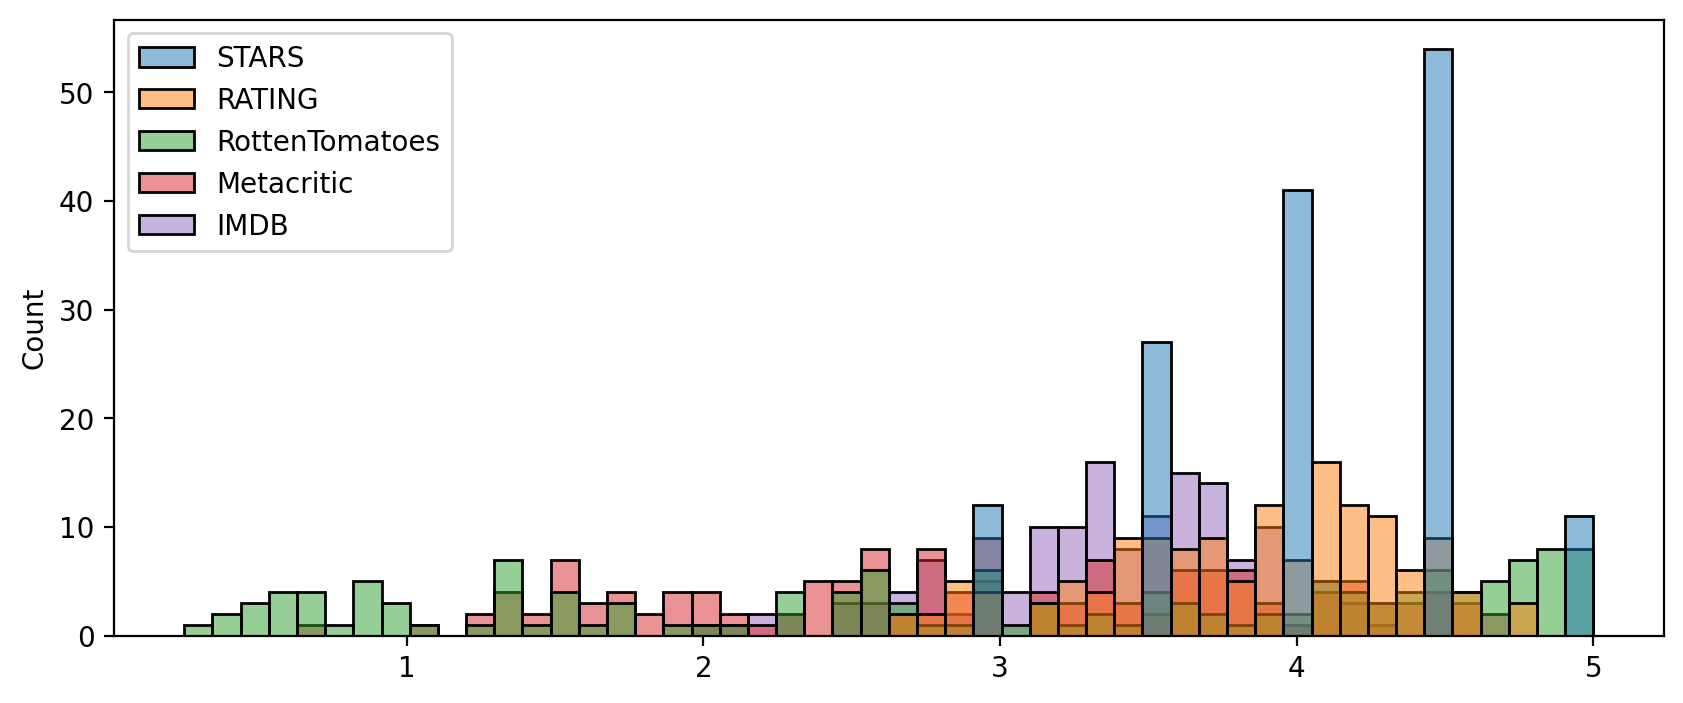

In [54]:
plt.figure(figsize=(10, 4), dpi=200)

sns.histplot(data=norm_scores,bins=50)


### How are the worst movies rated across all platforms?

**TASK: Create a clustermap visualization of all normalized scores. Note the differences in ratings, highly rated movies should be clustered together versus poorly rated movies. Note: This clustermap does not need to have the FILM titles as the index, feel free to drop it for the clustermap.**

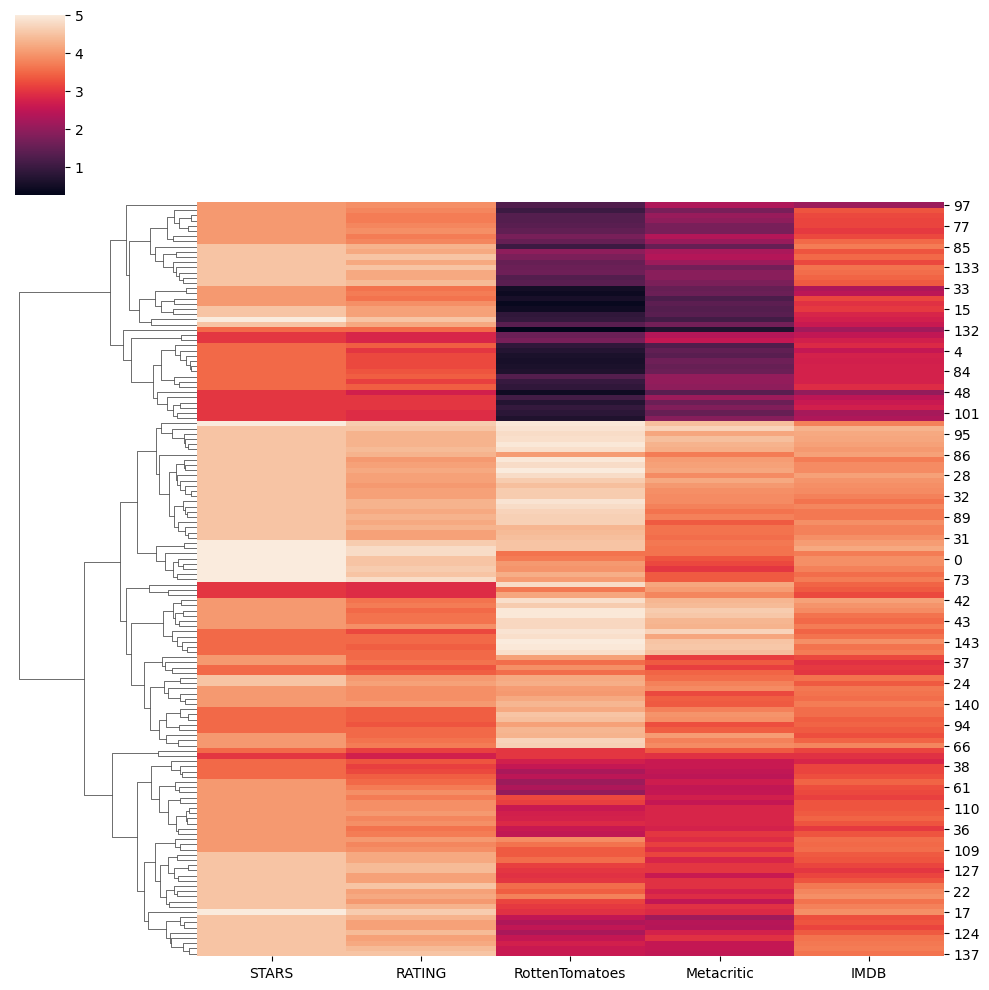

In [55]:
sns.clustermap(data=norm_scores,col_cluster=False)

**TASK: Clearly Fandango is rating movies much higher than other sites, especially considering that it is then displaying a rounded up version of the rating. Let's examine the top 10 worst movies. Based off the Rotten Tomatoes Critic Ratings, what are the top 10 lowest rated movies? What are the normalized scores across all platforms for these movies? You may need to add the FILM column back in to your DataFrame of normalized scores to see the results.**

In [56]:
norm_scores['FILM'] = combined['FILM']
norm_scores.sort_values('RottenTomatoes')[:10]

,STARS,RATING,RottenTomatoes,Metacritic,IMDB,FILM
132,3.5,3.5,0.25,0.65,2.15,Paul Blart: Mall Cop 2 (2015)
105,4.0,3.9,0.35,1.40,2.95,Hitman: Agent 47 (2015)
53,4.0,3.7,0.40,1.55,2.45,Hot Pursuit (2015)
48,3.0,2.7,0.45,1.35,2.00,Fantastic Four (2015)
15,4.5,4.1,0.45,1.30,3.05,Taken 3 (2015)
33,4.0,3.6,0.50,1.50,2.30,The Boy Next Door (2015)
35,4.0,3.6,0.55,1.20,3.15,The Loft (2015)
60,3.5,3.2,0.55,1.60,2.70,Unfinished Business (2015)
59,3.5,3.2,0.60,1.35,2.75,Mortdecai (2015)
58,3.5,3.2,0.60,1.50,2.75,Seventh Son (2015)


**FINAL TASK: Visualize the distribution of ratings across all sites for the top 10 worst movies.**

<Axes: ylabel='Density'>

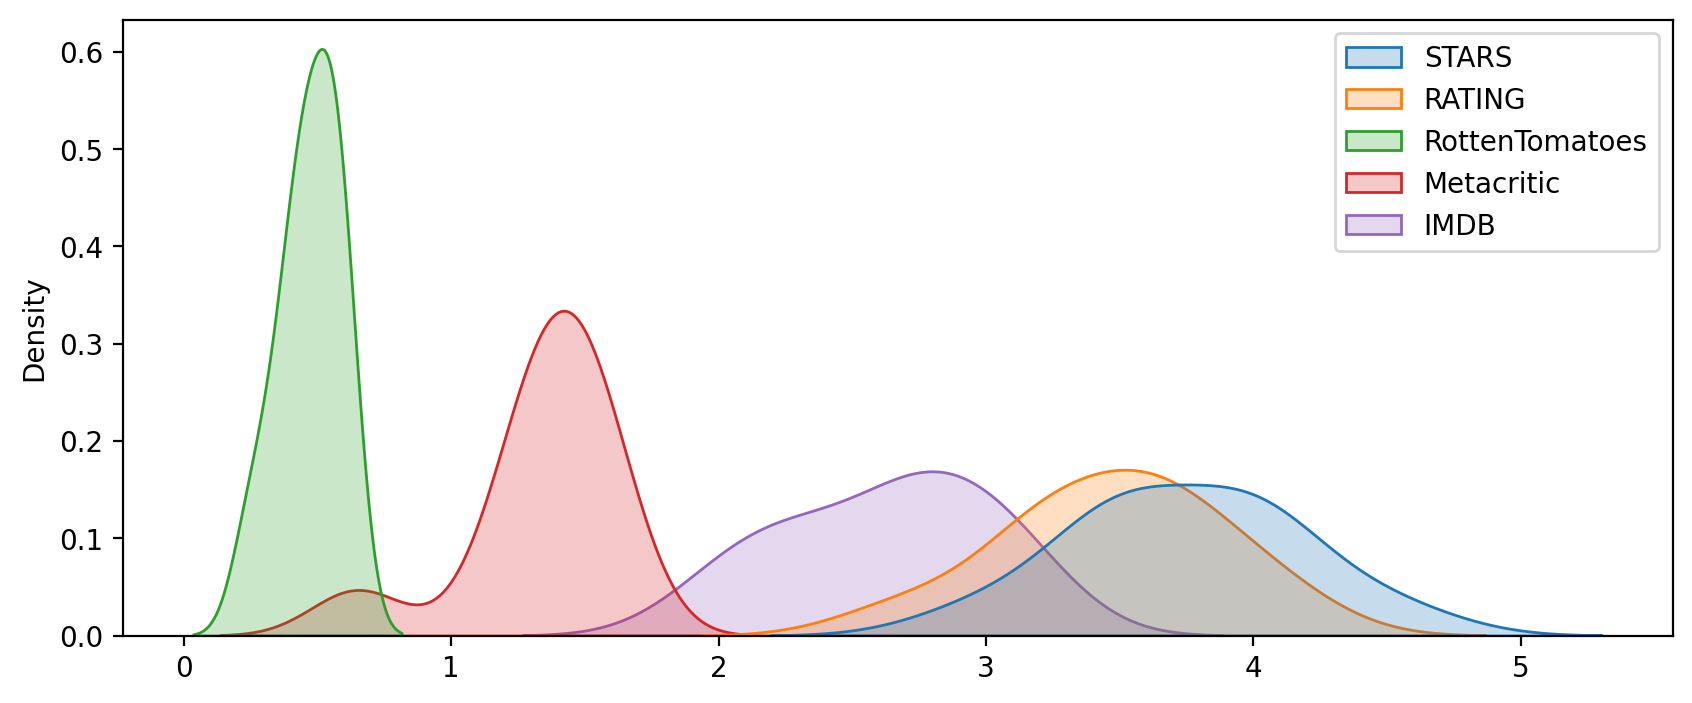

In [58]:
plt.figure(figsize=(10, 4), dpi=200)
sns.kdeplot(data=norm_scores.sort_values('RottenTomatoes')[:10], fill=True)

---

**Final thoughts: Wow! Fandango is showing around 3-4 star ratings for films that are clearly bad! Notice the biggest offender, [Taken 3!](https://www.youtube.com/watch?v=tJrfImRCHJ0). Fandango is displaying 4.5 stars on their site for a film with an [average rating of 1.86](https://en.wikipedia.org/wiki/Taken_3#Critical_response) across the other platforms!**